<a href="https://colab.research.google.com/github/Ohsoo46/AIFFEL_QUEST/blob/main/DS6_%5B%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8%5D%EB%89%B4%EC%8A%A4%EC%B9%B4%ED%85%8C%EA%B3%A0%EB%A6%AC_%EB%8B%A4%EC%A4%91%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 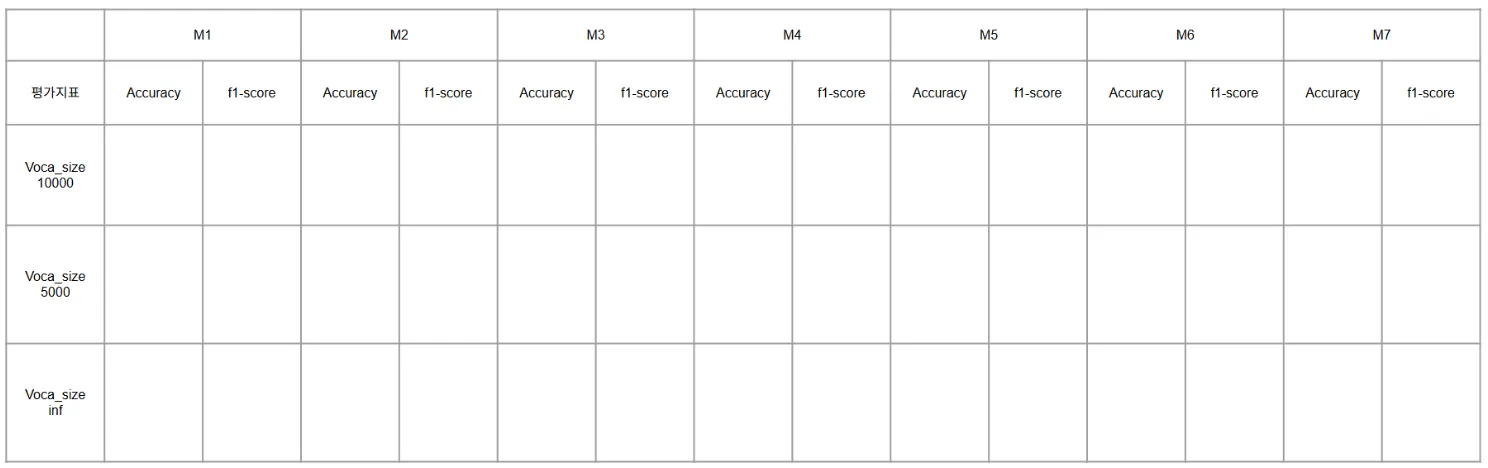
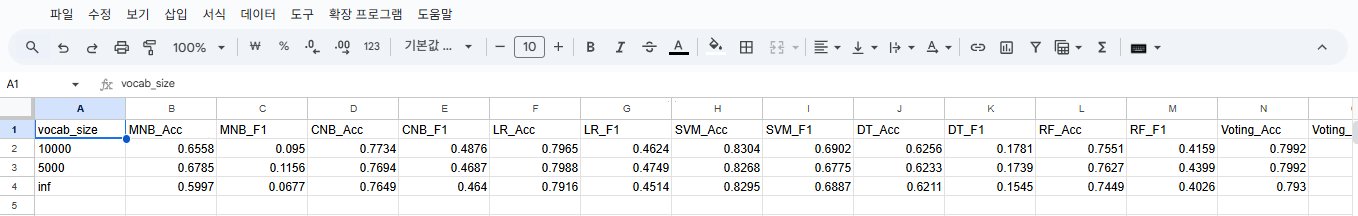

In [33]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

https://docs.google.com/spreadsheets/d/127mekGgdMASCaNmGAC3rT6ye8WVxwHESxZ-PAnYHHnA/edit#gid=0


# 회고

## 1. 모델의 성능 순위는
- 1위 — Linear SVM: 가장 높은 Accuracy/F1-score를 기록
    텍스트 분류에서 강력하다는 기존 연구와 동일한 결과/ vocab_size 변화에도 안정적

- 2위 — Voting Classifier (LR + CNB): Logistic Regression과 ComplementNB의 장점을 적절히 반영/ 단일 모델보다 더 안정적인 성능을 보임

- 3위 — Logistic Regression :벡터 기반 텍스트 분류에서 매우 강력한 모델/F1-score 측면에서도 안정적으로 높은 점수
-  Naive Bayes 계열(MNB/CNB) : MNB는 간단하지만 성능이 낮았음/ CNB는 불균형 데이터에 더 강해서 NB 중에서는 성능 우수

- Random Forest / Decision Tree :텍스트 고차원 sparse 데이터에서는 트리 기반 모델의 한계 노출, RF는 DT보다 낫지만 LR/SVM보다는 낮은 성능

###2. 회고
1) 모델이 많아질수록 연산 최적화가 중요하다는 점을 체감

특히 Gradient Boosting Tree가 학습 중 계속 멈추는 경험을 통해
컴퓨팅 자원의 한계 → 모델 선택의 중요성을 실감했고, 결국은 모델성능 실패!

2) vocab_size가 너무 크다고 무조건 좋은 것이 아니라는 점

10000과 5000은 큰 차이가 없었지만, inf는 오히려 성능이 떨어지는 경우가 존재함

이는 고차원 sparsity 문제와 과적합 가능성 때문이며,
적절한 vocab_size를 선택하는 것이 중요하다는 것을 확인했다.

텍스트 분류 실험 전체 흐름을 직접 구현하고 여러 모델을 공정한 조건에서 비교하며
수행 시간, 자원 한계, 성능을 고려한 실험 설계 조정까지 경험했다.

이는 자연어 처리에서 중요한 적합한 모델 선택, 효율적인 실험 설계, 결과 해석 능력을 한 단계 끌어올리는 과정이었다.

3. 개선 아이디어 / 다음 단계

TF-IDF 대신 Word2Vec, FastText, BERT 임베딩으로 확장과 딥러닝 모델(CNN, LSTM, Transformers)과 비교 연구를 수행하고자 함

#오늘 할일
### 실험 또 실험 🤯


1. 단어장 개수를 바꾸면서(10000, 5000, Nan) 8개의 ML모델을 사용해보고  accuacry와 f1-score를 비교
(표로 나타내보세요~) (벡터화는 tf-idf로 통일)

아래 모델은 예시입니다, 여러 모델을 실험해보세요

### 📊 단어장 개수별 ML 모델 성능 비교 (Accuracy / F1-score)

| Vocabulary Size | Model             | Accuracy | F1-Score |
|------------------|------------------|----------|----------|
| 10000            | LogisticRegression |          |          |
|                  | SVM                |          |          |
|                  | RandomForest       |          |          |
|                  | XGBoost            |          |          |
|                  | NaiveBayes         |          |          |
|                  | Dense              |          |          |
|                  | LightGBM           |          |          |
|                  | DecisionTree       |          |          |
| 5000             | LogisticRegression |          |          |
|                  | SVM                |          |          |
|                  | RandomForest       |          |          |
|                  | XGBoost            |          |          |
|                  | NaiveBayes         |          |          |
|                  | Dense              |          |          |
|                  | LightGBM           |          |          |
|                  | DecisionTree       |          |          |
| NaN (All words)  | LogisticRegression |          |          |
|                  | SVM                |          |          |
|                  | RandomForest       |          |          |
|                  | XGBoost            |          |          |
|                  | NaiveBayes         |          |          |
|                  | Dense              |          |          |
|                  | LightGBM           |          |          |
|                  | DecisionTree       |          |          |

2. 딥러닝과 머신런닝의 차이 비교하기
- 딥러닝 모델 1개 Dense를 이용해서 비교해보세요 평가지표 = accuacry, f1-score

In [1]:
from tensorflow.keras.datasets import reuters
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

# 데이터 준비
## index -> text
## DTM , TF-idf 학습데이터 준비

In [2]:
# 이부분에있는 num_words를 5000과 다른방법으로 바꿔보세요~

(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=None, test_split=0.2)

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
word_index = reuters.get_word_index(path="reuters_word_index.json")

550378/550378 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
index_to_word = { index+3 : word for word, index in word_index.items() }
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index]=token

In [5]:
decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

x_train = decoded
print(len(x_train))

8982


In [6]:
decoded_test = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded_test.append(t)

x_test = decoded_test
print(len(x_test))

2246


In [7]:
# 벡터화 DTM, TF-idf 방법
dtmvector = CountVectorizer()

tfidf_transformer = TfidfTransformer()

x_train_dtm = dtmvector.fit_transform(x_train)
x_test_dtm= dtmvector.transform(x_test)

x_train_tfidf = tfidf_transformer.fit_transform(x_train_dtm)
x_test_tfidf = tfidf_transformer.transform(x_test_dtm)

In [8]:
x_train_tfidf.shape

(8982, 26506)

In [9]:
x_test_tfidf.shape

(2246, 26506)

In [10]:
x_train[3]

"<sos> the farmers home administration the u s agriculture department's farm lending arm could lose about seven billion dlrs in outstanding principal on its severely delinquent borrowers or about one fourth of its farm loan portfolio the general accounting office gao said in remarks prepared for delivery to the senate agriculture committee brian crowley senior associate director of gao also said that a preliminary analysis of proposed changes in fmha's financial eligibility standards indicated as many as one half of fmha borrowers who received new loans from the agency in 1986 would be ineligible under the proposed system the agency has proposed evaluating applicants' credit using a variety of financial ratios instead of relying solely on cashflow ability senate agriculture committee chairman patrick leahy d vt slammed the proposed eligibility changes telling fmha administrator vance clark at a hearing that they would mark a dramatic shift in the agency's purpose away from being farmer

# 모델 정의 및 실험

여러가지 모델을 바꾸며 실험해보세요~

In [11]:
# TF-idf데이터로 XGBoost 모델 학습하기

# 이친구도 시간좀 걸립니다!

from xgboost import XGBClassifier

# XGBoost 모델 학습
xgb_model = XGBClassifier(n_estimators=100, max_depth=5, eval_metric='mlogloss')
xgb_model.fit(x_train_tfidf, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [12]:
# 예측
y_pred = xgb_model.predict(x_test_tfidf)

# 평가 지표
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')

print(f"✅ Accuracy : {acc:.4f}")
print(f"✅ F1-score : {f1:.4f}")

✅ Accuracy : 0.7992
✅ F1-score : 0.6556


# Dense NN 딥러닝 모델

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, LSTM, Dense, Dropout


# 아래 Dense의 레이어를 바꿔가며 성능을 확인해봅시다

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout

# 샘플 하나의 shape: (26506,)
inputs = Input(shape=(26506,))

x = Dense(512, activation='relu')(inputs)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
outputs = Dense(46, activation='softmax')(x)  # 클래스 46개

dense_model = Model(inputs=inputs, outputs=outputs)

dense_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
dense_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 26506)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    13,571,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 46)             │         5,934 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,643,182 (52.04 MB)

 Trainable params: 13,643,182 (52.04 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 시간이 좀 걸립니다! 한 20분정도..
dense_model.fit(x_train_tfidf, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 332s 1s/step - accuracy: 0.5207 - loss: 2.3021 - val_accuracy: 0.7490 - val_loss: 1.0868
Epoch 2/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 261s 1s/step - accuracy: 0.7998 - loss: 0.8445 - val_accuracy: 0.8024 - val_loss: 0.8961
Epoch 3/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 213s 950ms/step - accuracy: 0.8969 - loss: 0.4437 - val_accuracy: 0.8080 - val_loss: 0.8939
Epoch 4/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 194s 862ms/step - accuracy: 0.9359 - loss: 0.2523 - val_accuracy: 0.8108 - val_loss: 0.8779
Epoch 5/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 160s 710ms/step - accuracy: 0.9575 - loss: 0.1723 - val_accuracy: 0.8052 - val_loss: 0.9285
Epoch 6/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 129s 574ms/step - accuracy: 0.9639 - loss: 0.1311 - val_accuracy: 0.8097 - val_loss: 0.9154
Epoch 7/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 122s 538ms/step - accuracy: 0.9643 - loss: 0.1191 - val_accuracy: 0.8052 - val_loss: 0.9817
Epoch 8/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 112s 492ms/step - accuracy: 0.9626 - loss:

In [ ]:


y_pred_proba = dense_model.predict(x_test_tfidf)
y_pred = np.argmax(y_pred_proba, axis=1)

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"✅ Accuracy: {acc:.4f}")
print(f"✅ F1-score: {f1:.4f}")

71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step
✅ Accuracy: 0.6839
✅ F1-score: 0.6636


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, f1_score
import pandas as pd

from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier

# 단어장 크기 설정 (레이블, 실제 max_features 값)
vocab_settings = [
    ("10000", 10000),
    ("5000",  5000),
    ("NaN",   None)   # 단어장 제한 없음
]

def eval_model_all_vocabs(model_name, model):
    """하나의 모델에 대해 vocab_size 3개를 모두 돌리고 결과 DataFrame으로 반환"""
    rows = []

    for vocab_label, max_features in vocab_settings:
        # 1) TF-IDF 만들기 (여기서 vocab_size 바뀜)
        vectorizer = TfidfVectorizer(max_features=max_features)
        X_train_tfidf = vectorizer.fit_transform(x_train)
        X_test_tfidf  = vectorizer.transform(x_test)

        # 2) 모델 학습 & 평가
        model.fit(X_train_tfidf, y_train)
        y_pred = model.predict(X_test_tfidf)

        acc = accuracy_score(y_test, y_pred)
        f1  = f1_score(y_test, y_pred, average='macro')  # 다중분류 → macro F1

        rows.append({
            "Vocabulary Size": vocab_label,
            "Model": model_name,
            "Accuracy": round(acc, 4),
            "F1-Score": round(f1, 4)
        })

    return pd.DataFrame(rows)


# 1. 나이브 베이즈 (MultinomialNB)

In [15]:
nb_df = eval_model_all_vocabs("NaiveBayes", MultinomialNB())
nb_df


,Vocabulary Size,Model,Accuracy,F1-Score
0,10000,NaiveBayes,0.6558,0.0950
1,5000,NaiveBayes,0.6785,0.1156
2,NaN,NaiveBayes,0.5997,0.0677


# \2. ComplementNB

In [16]:
cnb_df = eval_model_all_vocabs("CNB", ComplementNB())
cnb_df


,Vocabulary Size,Model,Accuracy,F1-Score
0,10000,CNB,0.7734,0.4876
1,5000,CNB,0.7694,0.4687
2,NaN,CNB,0.7649,0.4640


# 🔹 3. 로지스틱 회귀

In [17]:
lr_df = eval_model_all_vocabs(
    "LogisticRegression",
    LogisticRegression(max_iter=3000)
)
lr_df


,Vocabulary Size,Model,Accuracy,F1-Score
0,10000,LogisticRegression,0.7965,0.4624
1,5000,LogisticRegression,0.7988,0.4749
2,NaN,LogisticRegression,0.7916,0.4514


# 🔹 4. SVM

In [18]:
svm_df = eval_model_all_vocabs("SVM", LinearSVC())
svm_df


,Vocabulary Size,Model,Accuracy,F1-Score
0,10000,SVM,0.8304,0.6902
1,5000,SVM,0.8268,0.6775
2,NaN,SVM,0.8295,0.6887


# 5. 결정 트리

In [19]:
dt_df = eval_model_all_vocabs(
    "DecisionTree",
    DecisionTreeClassifier(max_depth=10, random_state=0)
)
dt_df


,Vocabulary Size,Model,Accuracy,F1-Score
0,10000,DecisionTree,0.6256,0.1781
1,5000,DecisionTree,0.6233,0.1739
2,NaN,DecisionTree,0.6211,0.1545


#  6. 랜덤 포레스트

In [20]:
rf_df = eval_model_all_vocabs(
    "RandomForest",
    RandomForestClassifier(n_estimators=100, random_state=0)
)
rf_df


,Vocabulary Size,Model,Accuracy,F1-Score
0,10000,RandomForest,0.7551,0.4159
1,5000,RandomForest,0.7627,0.4399
2,NaN,RandomForest,0.7449,0.4026


# 7. 그래디언트 부스팅 트리

In [21]:
# gb_df = eval_model_all_vocabs(
#     "GradientBoosting",
#     GradientBoostingClassifier(random_state=0)
# )
# gb_df


KeyboardInterrupt: 

# 8. 보팅(VotingClassifier)



In [26]:
# 보팅에 사용할 기본 모델들
base_lr  = LogisticRegression(max_iter=3000)
base_cnb = ComplementNB()
base_gb  = GradientBoostingClassifier(random_state=0)

voting_clf = VotingClassifier(
    estimators=[
        ('lr',  base_lr),
        ('cnb', base_cnb),
      # 무거워서 일단 주석 처리    ('gb',  base_gb)
    ],
    voting='soft'
)

voting_df = eval_model_all_vocabs("Voting", voting_clf)
voting_df


,Vocabulary Size,Model,Accuracy,F1-Score
0,10000,Voting,0.7992,0.4852
1,5000,Voting,0.7992,0.4780
2,NaN,Voting,0.7930,0.4569


In [24]:
from sklearn.ensemble import GradientBoostingClassifier

base_gb = GradientBoostingClassifier(
    n_estimators=50,   # 기본 100 → 50으로 줄이기
    max_depth=2,       # 나무 깊이 얕게
    random_state=0
)

# 결과 정리

In [32]:
import pandas as pd

df = pd.DataFrame({
    "vocab_size": ["10000", "5000", "inf"],

    "MNB_Acc":  [0.6558, 0.6785, 0.5997],
    "MNB_F1":   [0.0950, 0.1156, 0.0677],

    "CNB_Acc":  [0.7734, 0.7694, 0.7649],
    "CNB_F1":   [0.4876, 0.4687, 0.4640],

    "LR_Acc":   [0.7965, 0.7988, 0.7916],
    "LR_F1":    [0.4624, 0.4749, 0.4514],

    "SVM_Acc":  [0.8304, 0.8268, 0.8295],
    "SVM_F1":   [0.6902, 0.6775, 0.6887],

    "DT_Acc":   [0.6256, 0.6233, 0.6211],
    "DT_F1":    [0.1781, 0.1739, 0.1545],

    "RF_Acc":   [0.7551, 0.7627, 0.7449],
    "RF_F1":    [0.4159, 0.4399, 0.4026],

    "Voting_Acc": [0.7992, 0.7992, 0.7930],
    "Voting_F1":  [0.4852, 0.4780, 0.4569],
})

df


,vocab_size,MNB_Acc,MNB_F1,CNB_Acc,CNB_F1,LR_Acc,LR_F1,SVM_Acc,SVM_F1,DT_Acc,DT_F1,RF_Acc,RF_F1,Voting_Acc,Voting_F1
0,10000,0.6558,0.0950,0.7734,0.4876,0.7965,0.4624,0.8304,0.6902,0.6256,0.1781,0.7551,0.4159,0.7992,0.4852
1,5000,0.6785,0.1156,0.7694,0.4687,0.7988,0.4749,0.8268,0.6775,0.6233,0.1739,0.7627,0.4399,0.7992,0.4780
2,inf,0.5997,0.0677,0.7649,0.4640,0.7916,0.4514,0.8295,0.6887,0.6211,0.1545,0.7449,0.4026,0.7930,0.4569
